# Crop Recommendation System Using Machine Learning

## Description
The Crop Recommendation System is a machine learning-based application that provides recommendations for suitable crops based on various environmental and soil conditions. It aims to assist farmers and agricultural professionals in making informed decisions about crop selection, optimizing yields, and maximizing profitability.

The system takes into account several factors such as soil type, climate, rainfall, temperature, humidity, and pH levels to determine the most suitable crops for a given region. By analyzing historical data and using predictive models, the system provides personalized recommendations tailored to the specific conditions of a farm or agricultural area.

## Key Featues
- Input Data Collection: The system allows users to input relevant data such as soil parameters, climate information, and geographic location.
- Data Preprocessing: The input data is preprocessed to handle missing values, normalize or scale features, and transform categorical variables.
- Machine Learning Models: Various machine learning algorithms are employed, including decision trees, random forests and logistic regression to build predictive models.
- Model Training and Evaluation: The models are trained on historical data and evaluated using appropriate performance metrics to ensure accuracy and reliability.
- Crop Recommendation: Based on the trained models, the system recommends the most suitable crops for the given input parameters.

## Technologies Used
- Python: Programming language used for model development, data preprocessing, and web application development.
- Scikit-learn: Machine learning library used for model training, evaluation, and prediction.
- Pandas: Data manipulation library used for data preprocessing and analysis.
- NumPy: Library for numerical computing used for handling arrays and mathematical operations.
- Seaborn and Matplotlib: Library for data visualization and advanced chart building.

## Important Links
- [Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset)

## Made By
- Devanshu Sawarkar
- Pratham Agrawal
- Devansh Motghare

## Importing Libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report

## Importing Dataset

In [97]:
data = pd.read_csv(r'dataset\Crop_recommendation.csv')

In [98]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [99]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [100]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [101]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [102]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [103]:
data.shape

(2200, 8)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [105]:
data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [106]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [107]:
data.duplicated().sum()

np.int64(0)

In [108]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

## Encoding

In [109]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
data['crop_num']=  data['label'].map(crop_dict)

In [110]:
data

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


### Dropping 'label' column

In [111]:
data.drop(['label'],axis=1,inplace=True)
data

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


## Train Test Split

In [112]:
X = data.drop(['crop_num'],axis=1)
y = data['crop_num']

In [113]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [114]:
X.shape

(2200, 7)

In [115]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [116]:
y.shape

(2200,)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


## Scaling the features using MinMaxScaler

In [119]:
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [120]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

## Training Model

Logistic Regression accuracy : 91.81818181818183%


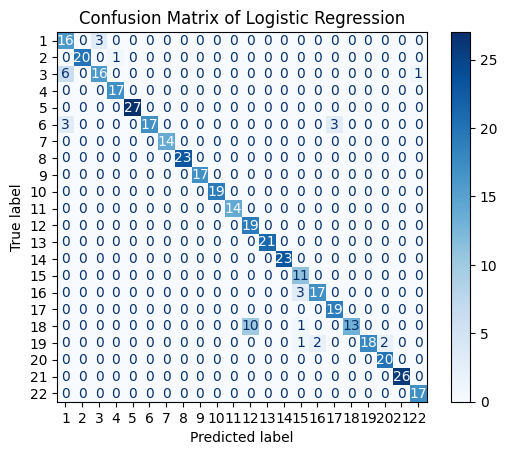

In [121]:
lr = LogisticRegression()

lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

# print the model accuracy
print(f"Logistic Regression accuracy : {accuracy_score(y_test,y_pred_lr) * 100}%")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

Decision Tree Classifier accuracy : 98.63636363636363%


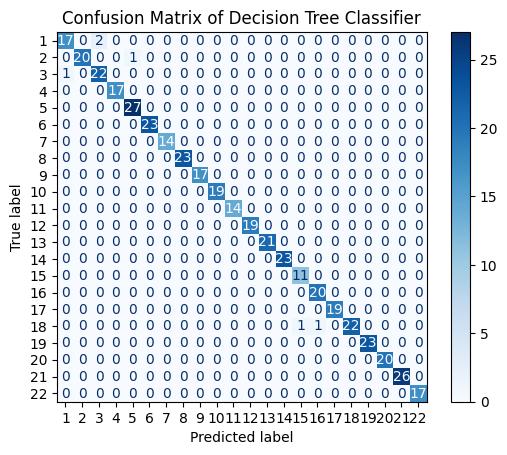

In [122]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred_df = dt.predict(X_test)

# print the model accuracy
print(f"Decision Tree Classifier accuracy : {accuracy_score(y_test,y_pred_df) * 100}%")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_df)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

Random Forest accuracy : 99.31818181818181%


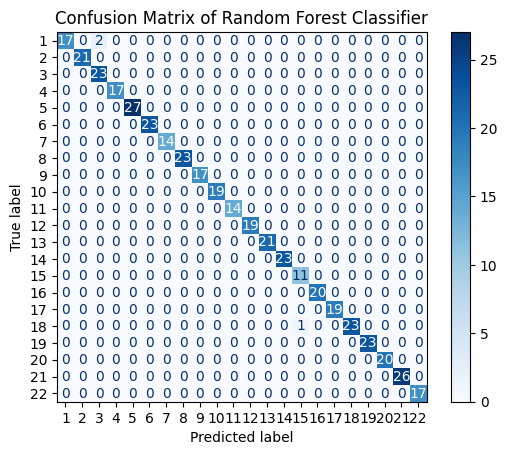

In [123]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# print the model accuracy
print(f"Random Forest accuracy : {accuracy_score(y_test,y_pred_rf) * 100}%")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()

## Choosing Random Forest Classifier for Predictions

In [124]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"Random Forest accuracy : {accuracy_score(y_test,y_pred) * 100}%")

Random Forest accuracy : 99.31818181818181%


In [125]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    transformed_features = ms.fit_transform(features)
    prediction = model.predict(transformed_features)
    print(prediction)
    return prediction[0]

In [126]:
crop_dict = {
    1: "Rice",
    2: "Maize",
    3: "Jute",
    4: "Cotton",
    5: "Coconut",
    6: "Papaya",
    7: "Orange",
    8: "Apple",
    9: "Muskmelon",
    10: "Watermelon",
    11: "Grapes",
    12: "Mango",
    13: "Banana",
    14: "Pomegranate",
    15: "Lentil",
    16: "Blackgram",
    17: "Mungbean",
    18: "Mothbeans",
    19: "Pigeonpeas",
    20: "Kidneybeans",
    21: "Chickpea",
    22: "Coffee"
}

# Testing the Model

In [127]:
N = int(input("Enter value of Nitrogen: "))
P = int(input("Enter value of Phosphorus: "))
k = int(input("Enter value of Potassium: "))
temperature = float(input("Enter value of Temperature: "))
humidity = float(input("Enter value of Humidity: "))
ph = float(input("Enter value of PH: "))
rainfall = float(input("Enter value of Rainfall: "))

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

if predict in crop_dict:
    crop = crop_dict[predict]
    print(f'Nitrogen: {N}\nPhosphorus: {P}\nPotassium: {k}\nTemperature: {temperature}\nHumidity: {humidity}\nPH: {ph}\nRainfall: {rainfall}\n')
    print(f"{crop} is a best crop to be cultivated ")
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[9]
Nitrogen: 115
Phosphorus: 17
Potassium: 55
Temperature: 27.57
Humidity: 94.11
PH: 6.77
Rainfall: 28.08

Muskmelon is a best crop to be cultivated 


## Saving the Model

In [139]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=[
    'Rice',
    'Maize',
    'Jute',
    'Cotton',
    'Coconut',
    'Papaya',
    'Orange',
    'Apple',
    'Muskmelon',
    'Watermelon',
    'Grapes',
    'Mango',
    'Banana',
    'Pomegranate',
    'Lentil',
    'Blackgram',
    'Mungbean',
    'Mothbeans',
    'Pigeonpeas',
    'Kidneybeans',
    'Chickpea',
    'Coffee'
]))

              precision    recall  f1-score   support

        Rice       1.00      0.89      0.94        19
       Maize       1.00      1.00      1.00        21
        Jute       0.92      1.00      0.96        23
      Cotton       1.00      1.00      1.00        17
     Coconut       1.00      1.00      1.00        27
      Papaya       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00        14
       Apple       1.00      1.00      1.00        23
   Muskmelon       1.00      1.00      1.00        17
  Watermelon       1.00      1.00      1.00        19
      Grapes       1.00      1.00      1.00        14
       Mango       1.00      1.00      1.00        19
      Banana       1.00      1.00      1.00        21
 Pomegranate       1.00      1.00      1.00        23
      Lentil       0.92      1.00      0.96        11
   Blackgram       1.00      1.00      1.00        20
    Mungbean       1.00      1.00      1.00        19
   Mothbeans       1.00    

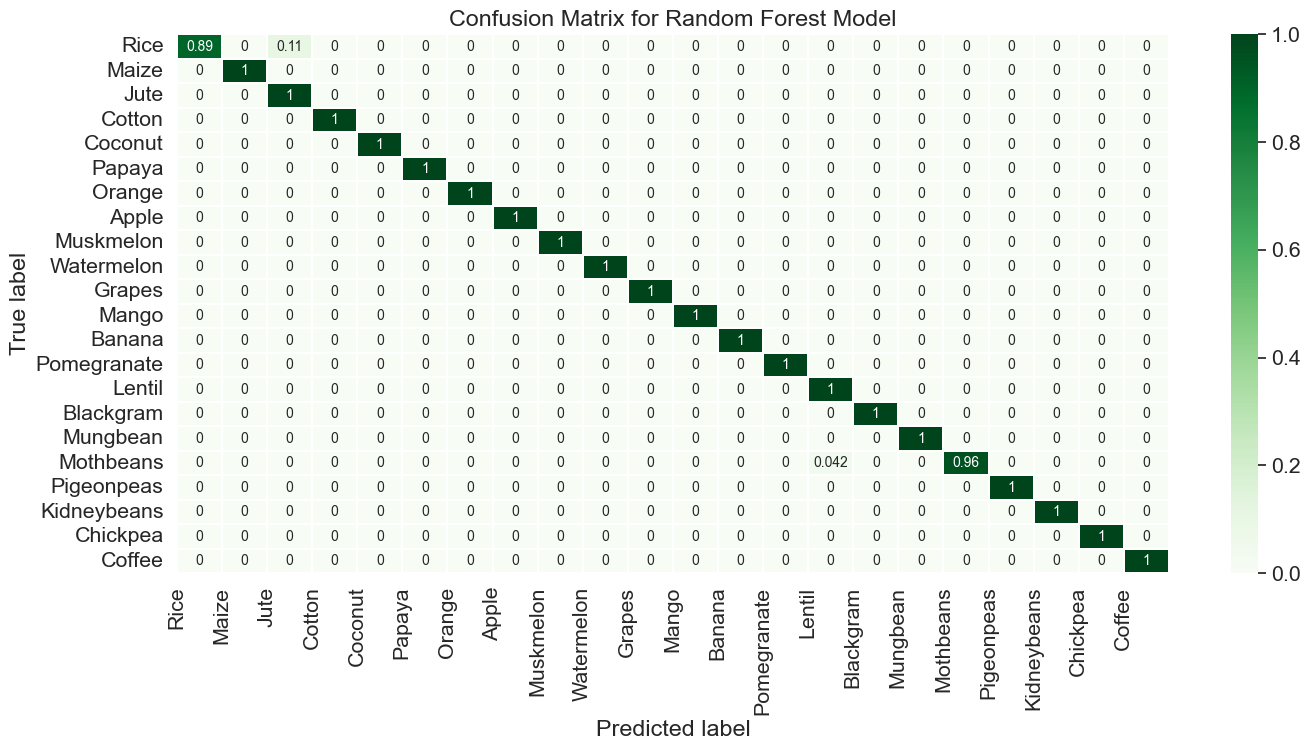

In [138]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

class_names = [
    'Rice',
    'Maize',
    'Jute',
    'Cotton',
    'Coconut',
    'Papaya',
    'Orange',
    'Apple',
    'Muskmelon',
    'Watermelon',
    'Grapes',
    'Mango',
    'Banana',
    'Pomegranate',
    'Lentil',
    'Blackgram',
    'Mungbean',
    'Mothbeans',
    'Pigeonpeas',
    'Kidneybeans',
    'Chickpea',
    'Coffee'
]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [128]:
import joblib
joblib.dump(model, 'models/crop_recommendation_system.pkl')

['models/crop_recommendation_system.pkl']